## 1. Time series with pandas

### 1. numpy & pandas datetime

In [3]:
import numpy as np

- numpy datetime array

In [4]:
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype = 'datetime64')

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

In [6]:
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[Y]')

array(['2016', '2017', '2018'], dtype='datetime64[Y]')

- numpy date range

In [11]:
np.arange('2018-06-01', '2018-06-25', 5, dtype = 'datetime64[D]' )

array(['2018-06-01', '2018-06-06', '2018-06-11', '2018-06-16',
       '2018-06-21'], dtype='datetime64[D]')

- pandas datetime index
: https://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [12]:
import pandas as pd

pandas에는 DatetimeIndex 라는 특별한 index가 존재한다. 이를 만들어보자.

In [17]:
# pd.date_range()
idx = pd.date_range('7/8/2019', periods = 3, freq = 'M')
idx

DatetimeIndex(['2019-07-31', '2019-08-31', '2019-09-30'], dtype='datetime64[ns]', freq='M')

In [18]:
# pd.to_datetime()
idx = pd.to_datetime(['Jan 01, 2018','1/2/18','03-Jan-2018',None])
idx

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', 'NaT'], dtype='datetime64[ns]', freq=None)

In [19]:
idx = pd.to_datetime(['2--1--2018','3--1--2018'],format = '%d--%m--%Y')
# 이런식으로 할 수도 있다  format을 좀 더 자유롭게 사용가능
idx

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [20]:
# pd.DatetimeIndex()
some_dates = np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')
some_dates
idx = pd.DatetimeIndex(some_dates)
idx

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[ns]', freq=None)

### 2. Time resampling

In [21]:
import pandas as pd
%matplotlib inline

In [23]:
df = pd.read_csv('Data/starbucks.csv', index_col='Date', parse_dates=True)

In [24]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [25]:
df.resample(rule = 'A').mean()
# rule 에 따라서 묶어진다. (groupby 같은 느낌)

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


### 3. Time shifting

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('Data/starbucks.csv',index_col='Date',parse_dates=True)

In [30]:
df.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [32]:
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [35]:
df.shift(periods=1, freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


### 4. Rolling and Expanding
- simple moving average 를 구하는 것이다.

In [42]:
import pandas as pd
%matplotlib inline

In [43]:
# Import the data:
df = pd.read_csv('Data/starbucks.csv', index_col='Date', parse_dates=True)

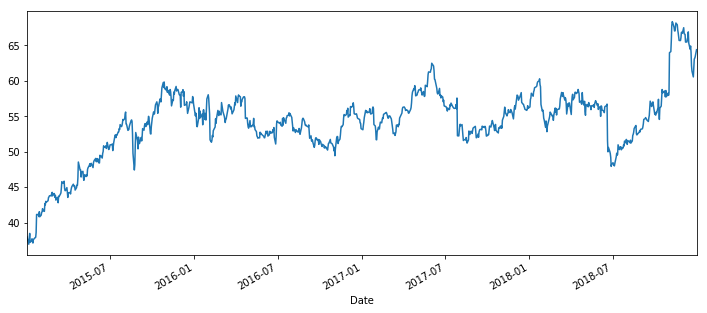

In [44]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

In [46]:
# 7 day rolling mean
df.rolling(window=7).mean().head(10)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


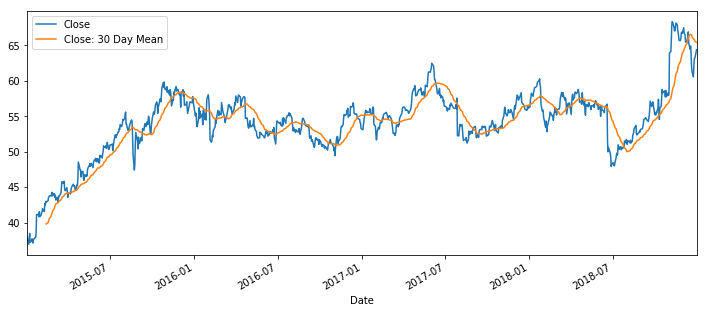

In [48]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

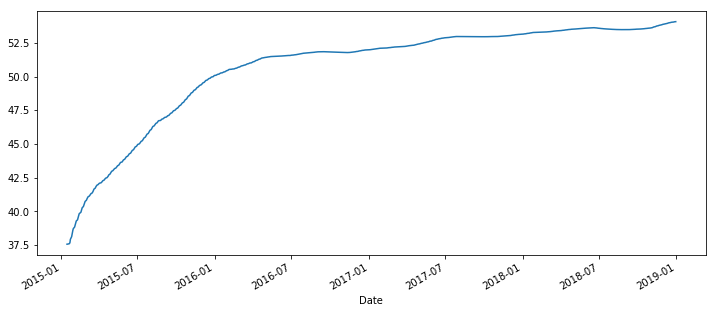

In [51]:
df['Close'].expanding(min_periods=10).mean().plot(figsize=(12,5));
# 누적을 의미하고 min_periods가 처음 시작점을 의미한다

### 5. visualizing time series data

In [52]:
import pandas as pd
%matplotlib inline

In [53]:
df = pd.read_csv('Data/starbucks.csv',index_col='Date',parse_dates=True)

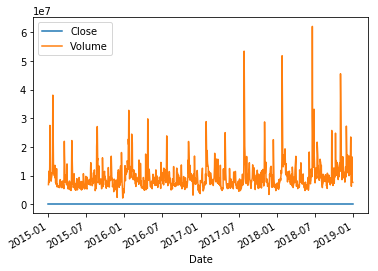

In [55]:
df.plot();

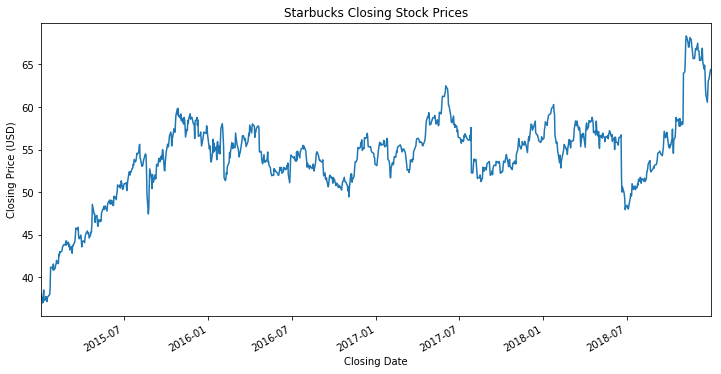

In [56]:
# title, axis label
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

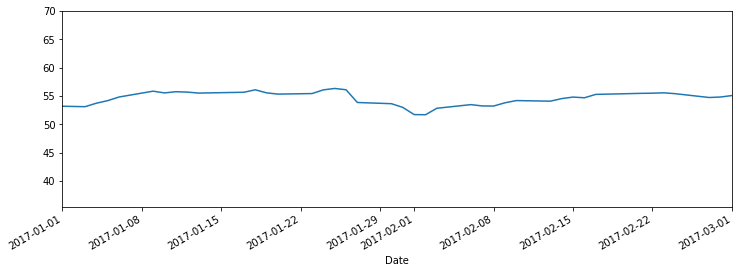

In [57]:
# xlim, ylim
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01']);

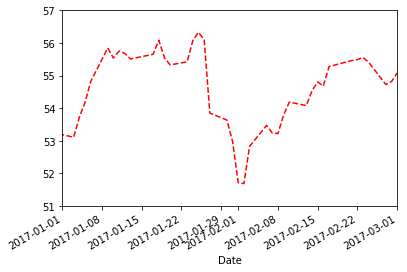

In [59]:
# color, style
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],ls='--',c='r');

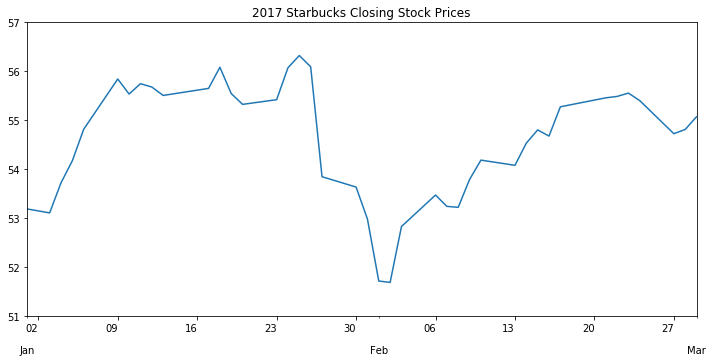

In [63]:
# axis
from matplotlib import dates

ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],
                      ylim=[51,57],
                      rot=0,
                      figsize = (12,6),
                      title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

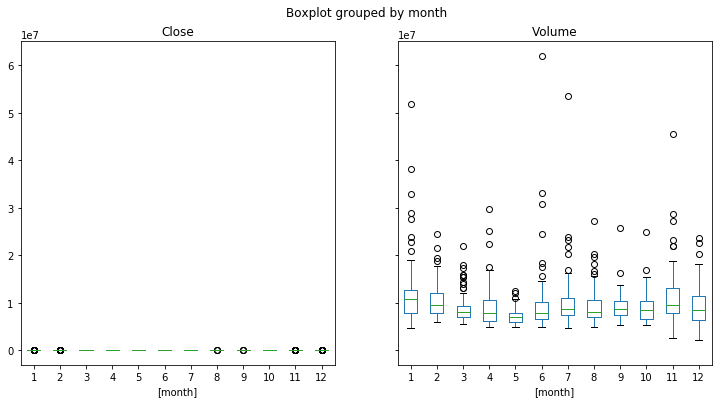

In [70]:
df['month'] = df.index.month
df.boxplot(by = 'month', figsize = (12,6), grid = False);